In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset

data_path = 'credit_risk_dataset.csv'
df = pd.read_csv(data_path)

# Exploratory Data Analysis (EDA)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Distribution of Numerical Features

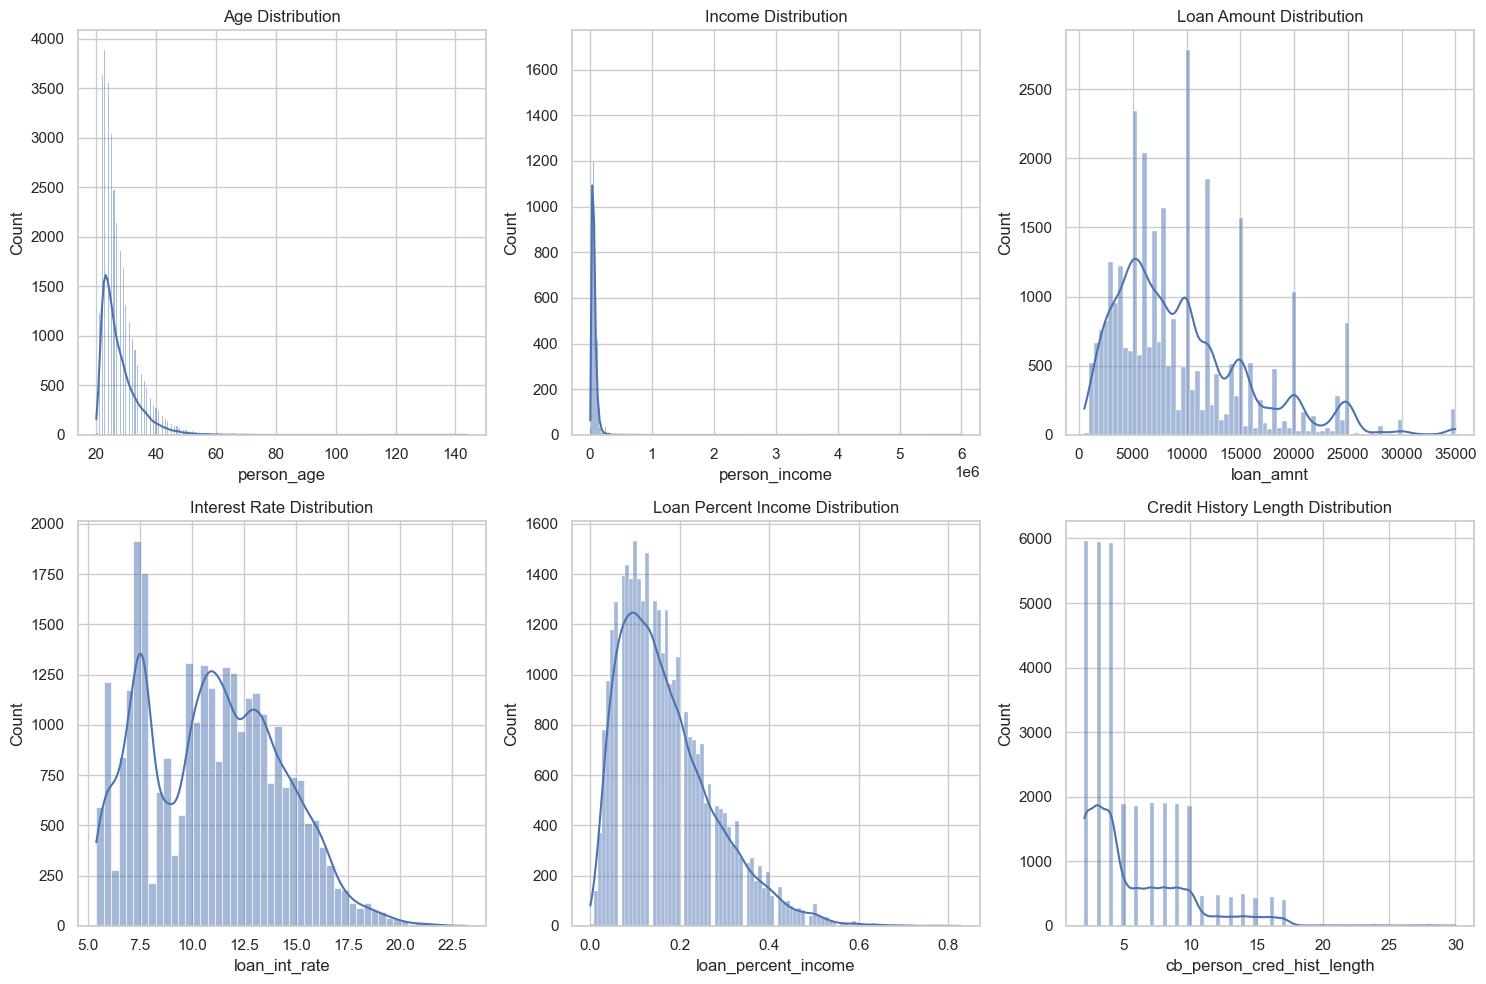

In [2]:
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(df['person_age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['person_income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

sns.histplot(df['loan_amnt'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount Distribution')

sns.histplot(df['loan_int_rate'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate Distribution')

sns.histplot(df['loan_percent_income'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Loan Percent Income Distribution')

sns.histplot(df['cb_person_cred_hist_length'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Credit History Length Distribution')

plt.tight_layout()
plt.show()

### Count Plots for Categorical Features
Correlations between the numerical features.

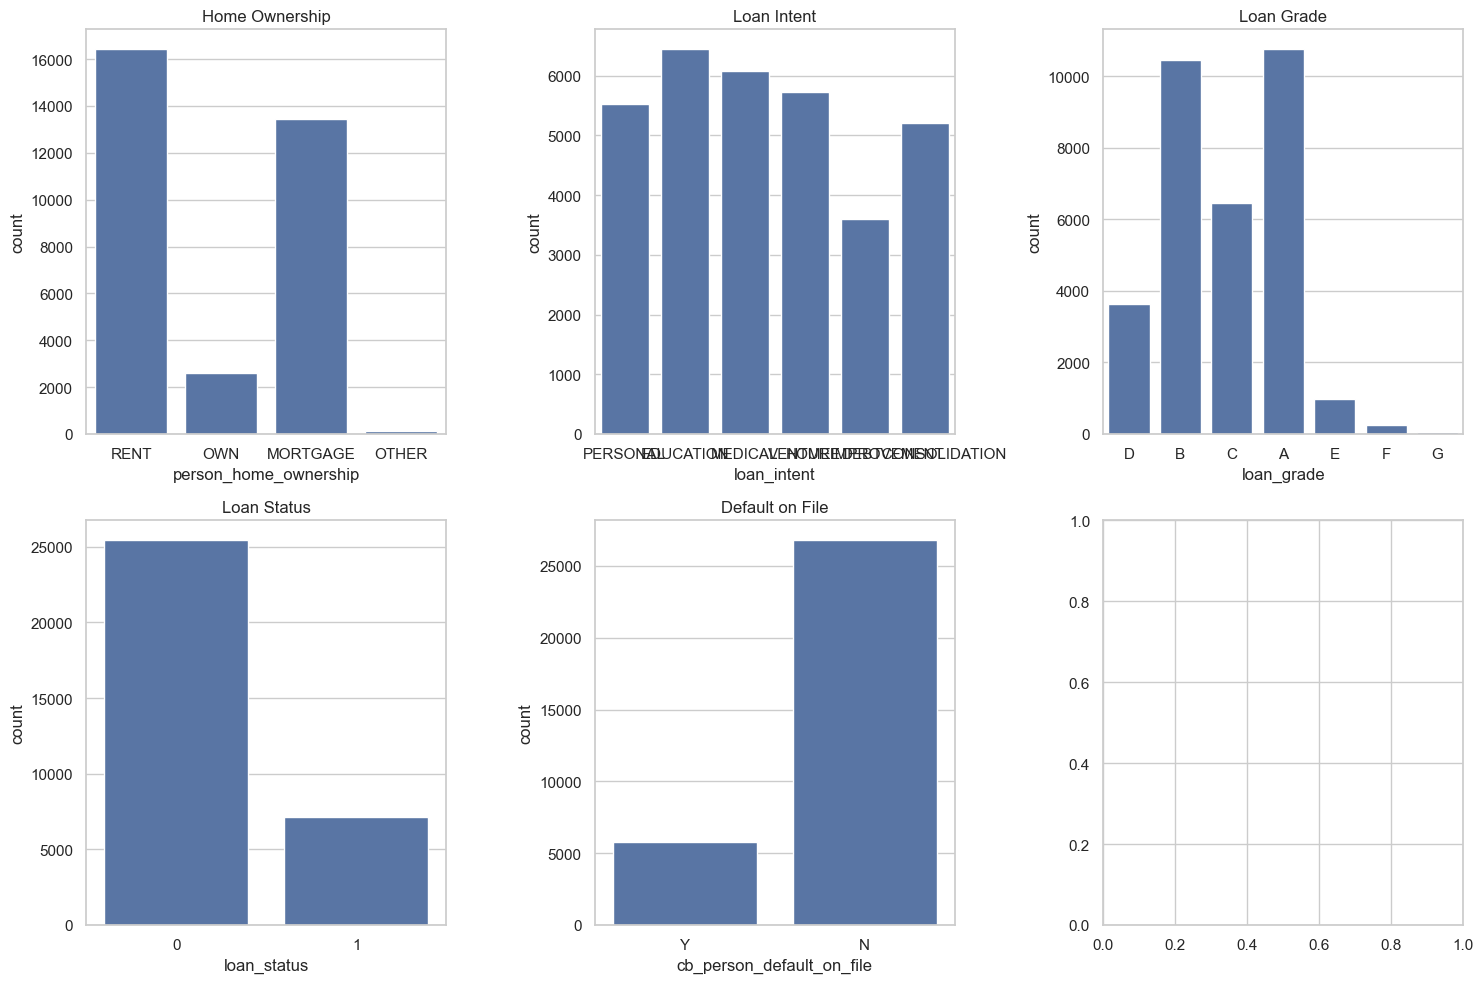

In [3]:
# Plot count plots of categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.countplot(x='person_home_ownership', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Home Ownership')

sns.countplot(x='loan_intent', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Loan Intent')

sns.countplot(x='loan_grade', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Loan Grade')

sns.countplot(x='loan_status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Status')

sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Default on File')

plt.tight_layout()
plt.show()

### Correlation Heatmap

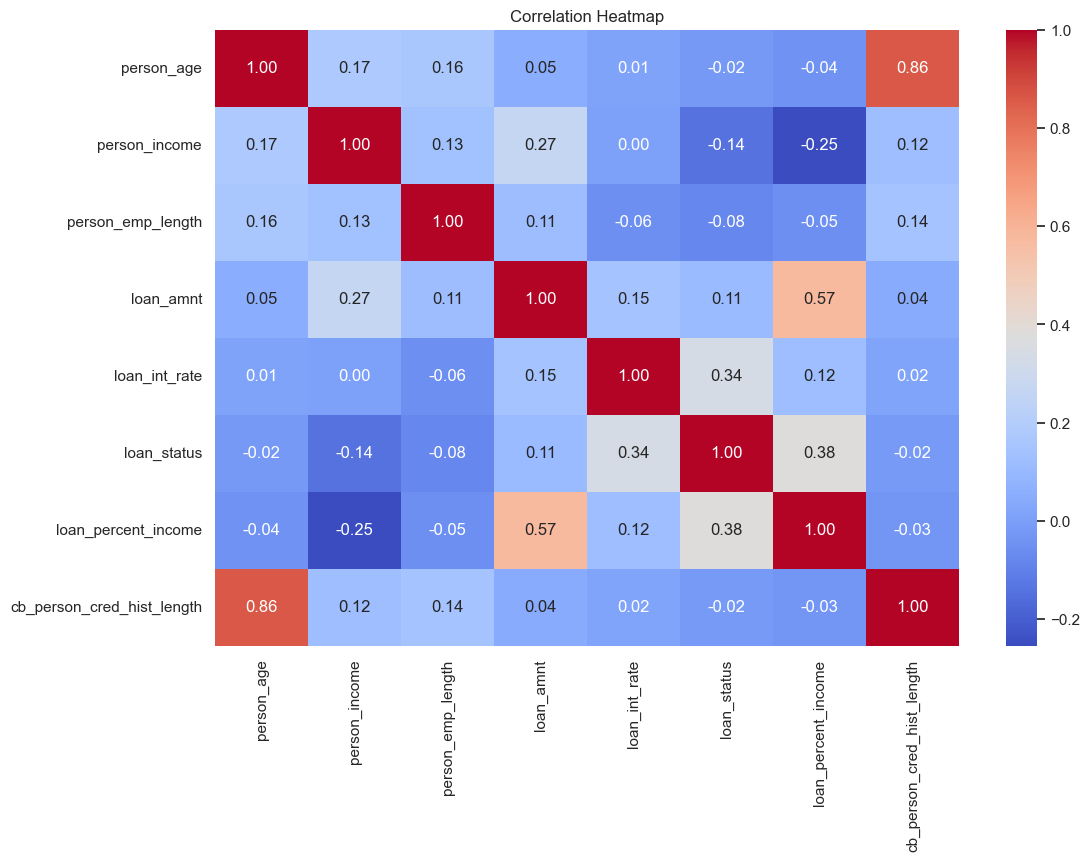

In [4]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Pair Plot
Relationships between pairs of features.

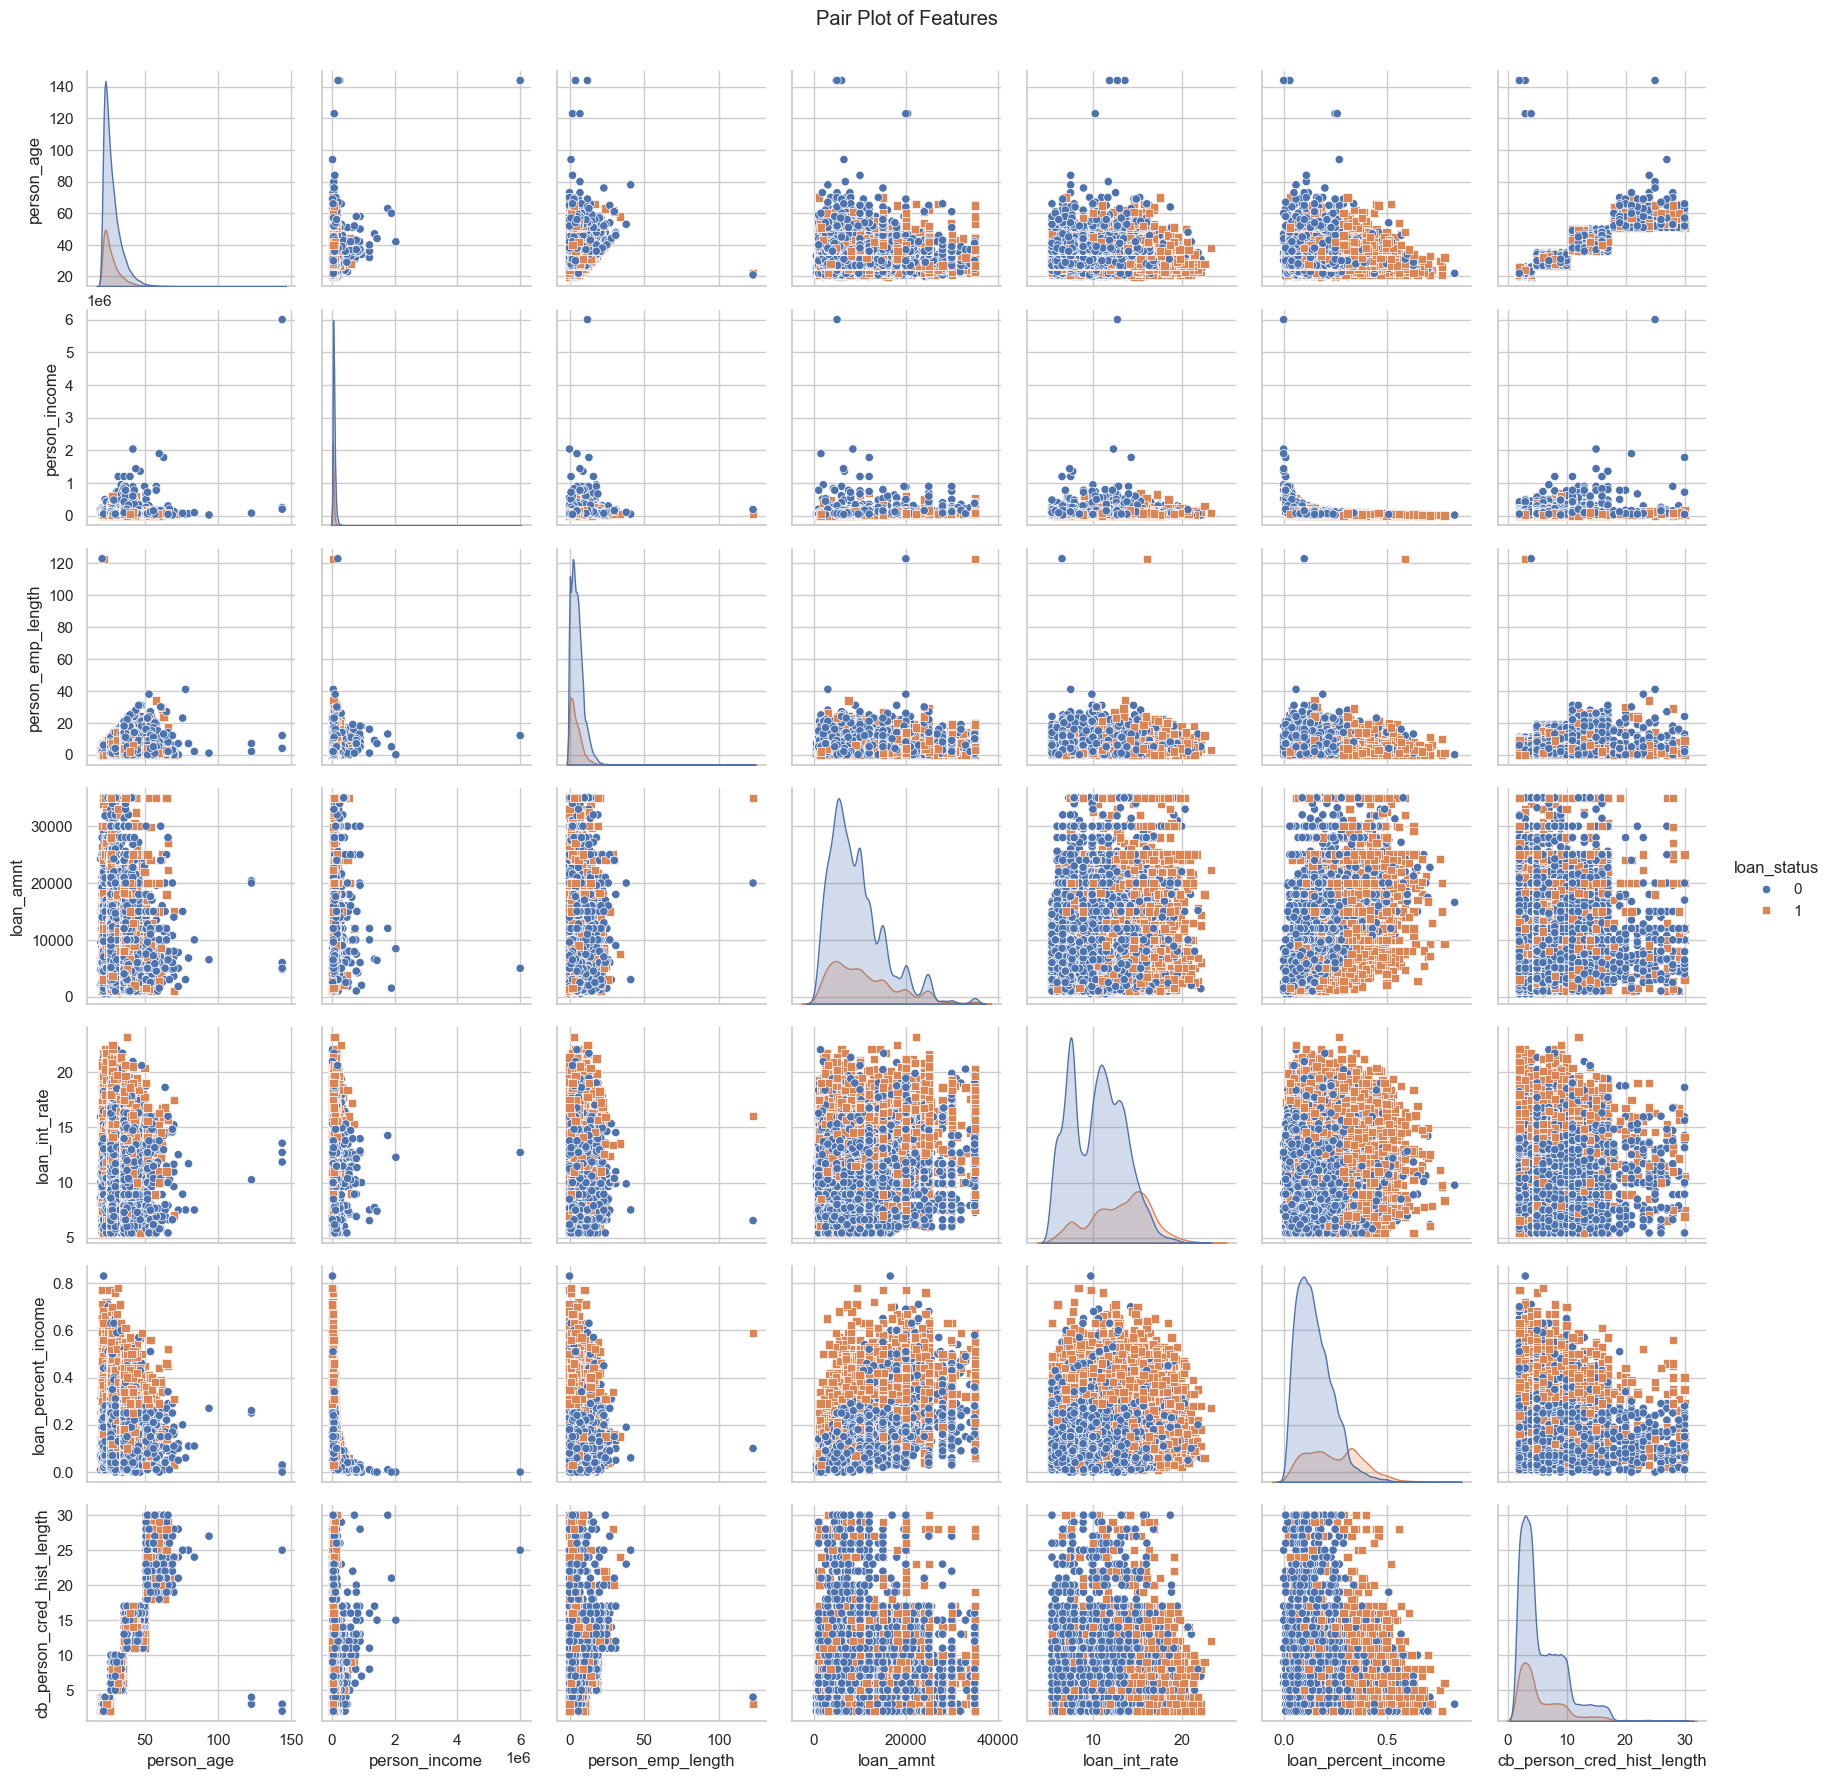

In [5]:
sns.pairplot(df, hue='loan_status', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

### Box Plots for Numerical Features by Loan Status
Distribution of numerical features with respect to loan status.

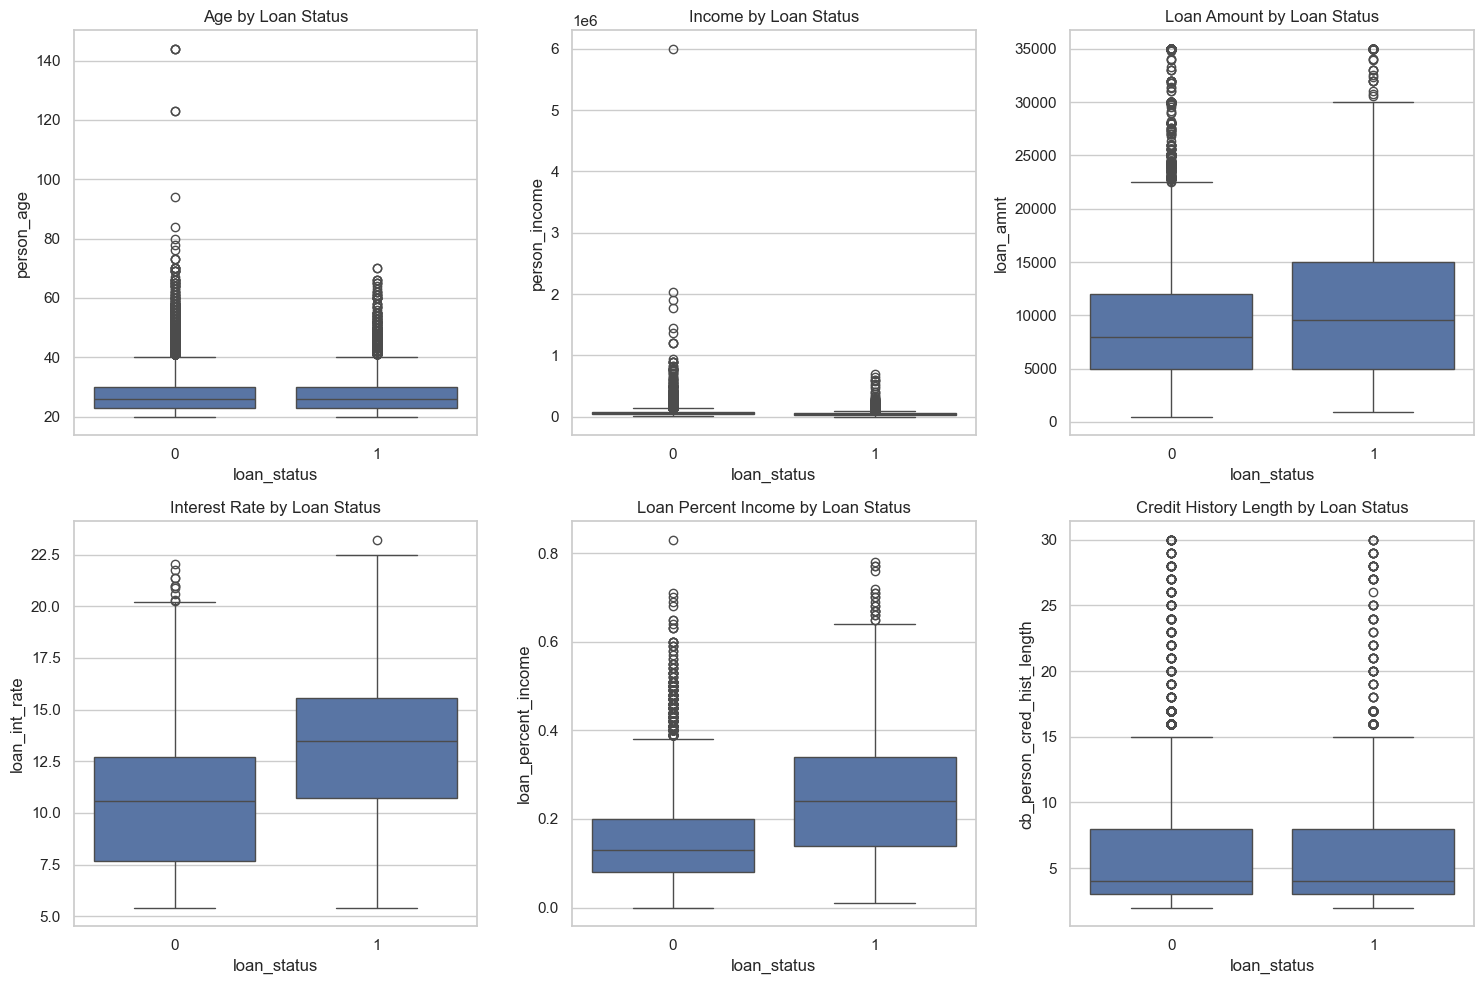

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.boxplot(x='loan_status', y='person_age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age by Loan Status')

sns.boxplot(x='loan_status', y='person_income', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Income by Loan Status')

sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount by Loan Status')

sns.boxplot(x='loan_status', y='loan_int_rate', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate by Loan Status')

sns.boxplot(x='loan_status', y='loan_percent_income', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Percent Income by Loan Status')

sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Credit History Length by Loan Status')

plt.tight_layout()
plt.show()